# Problem formulation: 🧐

We are going to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.This is a binary classification task. Given a data sample (information about the dating session), we are going to predict the probability (0-1, float) that the dating session will lead to a successful match. Data mining function required is probabilistic classification.

#### The impact 
It will help  in recommending for each individual is dream partner that will lead for successful relationship for long lasting time

What is an ideal solution?
XGboost classifier with max depth 6

# Preparing our tools 🛠️

In [ ]:
#Preparing our tools
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Preparing our dataset 📈

In [ ]:
#Reading our dataset
df = pd.read_csv("/train.csv")  #Reading our train set 
df1 = pd.read_csv("/test.csv")   #Reading our test set
df #printing our train set

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,2.0,18,1,214.0,...,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN,3390
5905,1,24,2,9,20,19,15.0,5,6,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4130
5906,0,13,2,11,21,5,5.0,3,18,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1178
5907,1,10,2,7,16,6,14.0,9,10,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5016


In [ ]:
df.describe()  #Getting a deeper description of our data

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


In [ ]:
#Declaring id value for later use in our submission
id=df1.id

# Visualizing our data

<AxesSubplot:title={'center':'Correlation Heatmap'}>

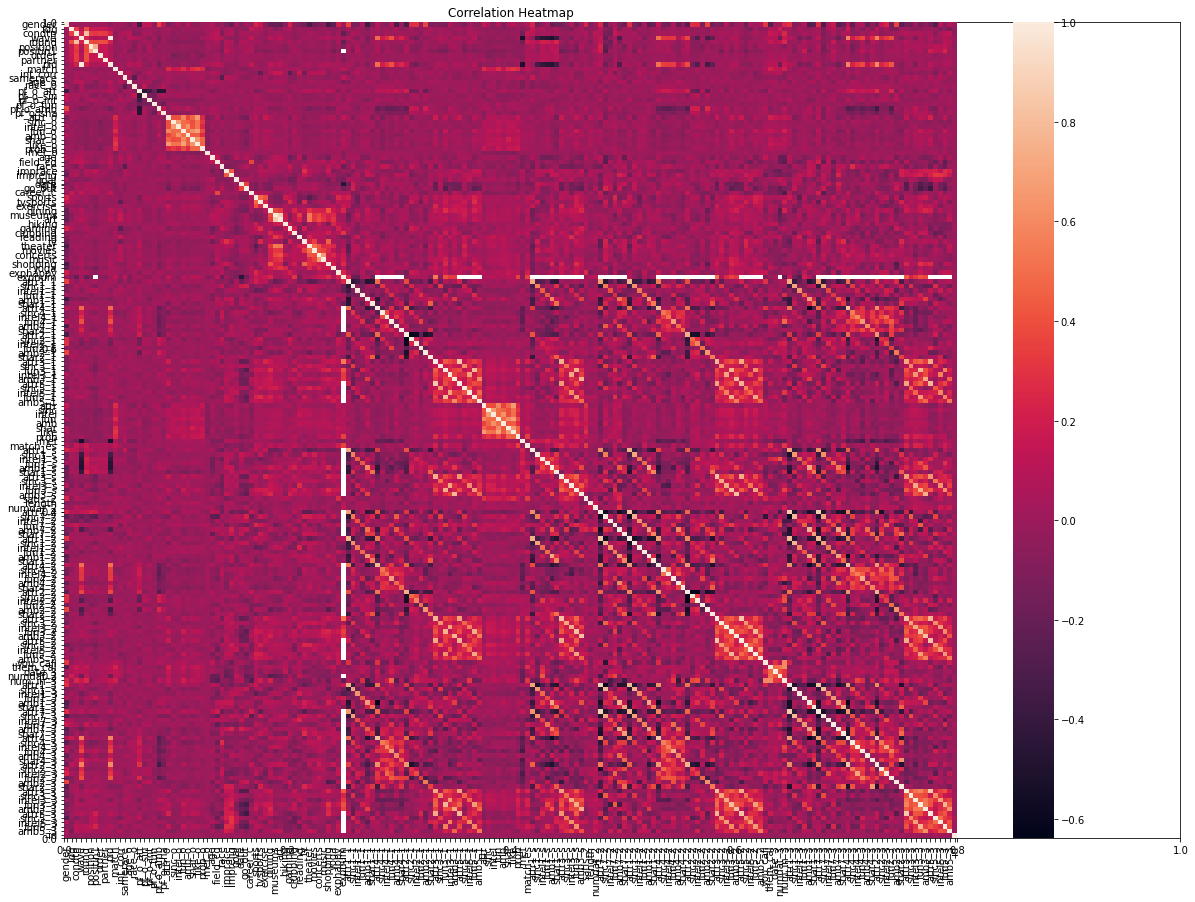

In [ ]:
#Checking the correlation
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Handling missing values  🧹🪠

In [ ]:
#Renaming some of the columns just for more clarifications of its content
pd.options.display.max_columns = None

df.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                  
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                  
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)

df1.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                  
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                  
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)


In [ ]:
#Is there anything missing values?
df.isnull().sum().sort_values(ascending=False)

num_in_3     5449
numdat_3     4849
expnum       4627
amb7_2       4519
sinc7_2      4519
             ... 
position        0
round           0
wave            0
Condition       0
id              0
Length: 192, dtype: int64

### From our observation we can see that we have many null values in dataset columns: 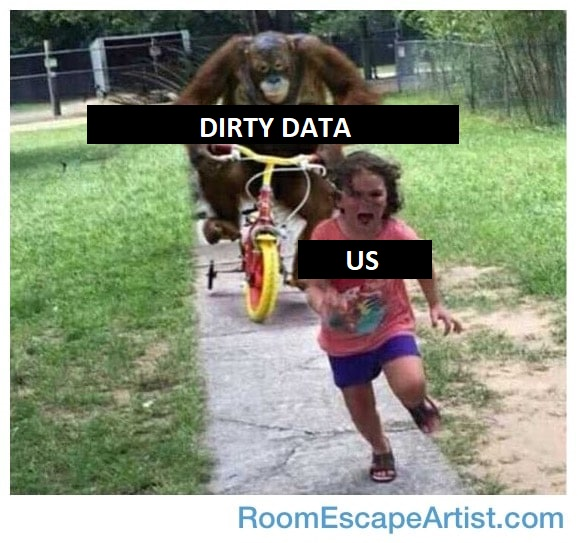

In [ ]:
# checking datatypes of our columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, Gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [ ]:
#This function is defined to find out the percentage of nul values in each column
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(df))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(df)

,missing_values(%),missing_values(numbers)
num_in_3,92.215265,5449
numdat_3,82.061262,4849
expnum,78.304282,4627
amb7_2,76.476561,4519
sinc7_2,76.476561,4519
...,...,...
position,0.000000,0
round,0.000000,0
wave,0.000000,0
Condition,0.000000,0


### From our observation we find out that there are many columns that have null values more than 50% of its total values which we can drop 

# 💣🧨💣🧨

In [ ]:
#Dropping id column as it doesn't give us any useful information 
df.drop('id',axis='columns', inplace=True)
df1.drop('id',axis='columns', inplace=True)

In [ ]:
#Removing columns that have NaN values more than 50% of its values
#Droppping field and career as we have career_c which is a code for each carrer value and field_cd which is a code values for each field (field and carrer are redundant info)
df.drop(columns=['field', 'career','num_in_3','numdat_3','expnum','sinc7_2','amb7_2','shar7_2','attr7_2','intel7_2','fun7_2','attr5_3','shar7_3','shar2_3','sinc5_3','intel5_3',
'attr7_3','sinc7_3','fun5_3','intel7_3','fun7_3','amb5_3','amb7_3','sinc4_3','sinc4_3','attr4_3','intel4_3','fun4_3','shar4_3','attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','amb4_3','mn_sat','tuition','intel3_3','them_cal','sinc3_3','you_call','attr3_3','date_3','amb3_3','fun3_3','shar1_3','attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','amb3_s','attr3_s','sinc3_s','fun3_s','intel3_s','shar1_s','amb1_s','fun1_s','intel1_s','sinc1_s','attr1_s'],axis='columns', inplace=True)

df1.drop(columns=['field', 'career','num_in_3','numdat_3','expnum','sinc7_2','amb7_2','shar7_2','attr7_2','intel7_2','fun7_2','attr5_3','shar7_3','shar2_3','sinc5_3','intel5_3',
'attr7_3','sinc7_3','fun5_3','intel7_3','fun7_3','amb5_3','amb7_3','sinc4_3','sinc4_3','attr4_3','intel4_3','fun4_3','shar4_3','attr2_3','sinc2_3',
'intel2_3','fun2_3','amb2_3','amb4_3','mn_sat','tuition','intel3_3','them_cal','sinc3_3','you_call','attr3_3','date_3','amb3_3','fun3_3','shar1_3','attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','amb3_s','attr3_s','sinc3_s','fun3_s','intel3_s','shar1_s','amb1_s','fun1_s','intel1_s','sinc1_s','attr1_s'],axis='columns', inplace=True)




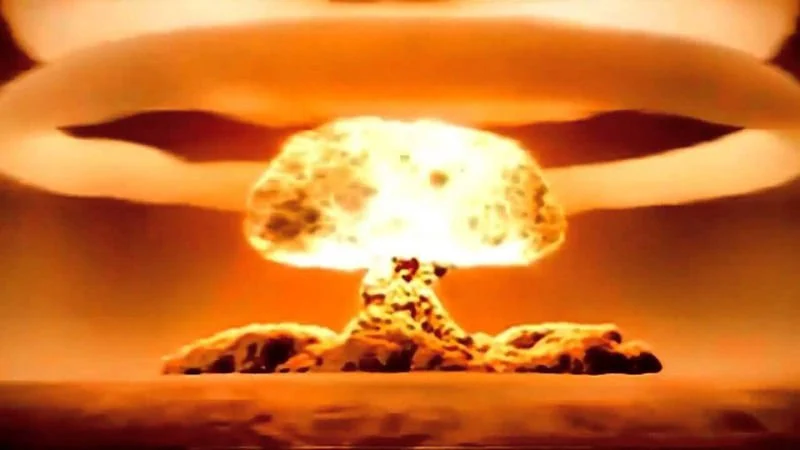

In [ ]:
missing_values(df) #Now we have only columns which have Nans less than 50%

,missing_values(%),missing_values(numbers)
income,48.434591,2862
sinc5_2,47.740734,2821
attr5_2,47.740734,2821
amb5_2,47.740734,2821
intel5_2,47.740734,2821
...,...,...
order,0.000000,0
partner,0.000000,0
match,0.000000,0
idg,0.000000,0


# Splitting the data

In [ ]:
# now we can split the data into lables and features for train dataset and identifing the features in test data set
import numpy as np
from sklearn.model_selection import train_test_split

y_train = df['match'] 
X_train = df.drop('match', axis=1)

X_test = df1.loc[:] 




In [ ]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(X_train.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(X_train.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['Gender', 'idg', 'Condition', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age of partner', 'race of partner', 'partner stated preference', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'partner rating of attributes', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'race importance', 'religion importance', 'goal', 'frequency of date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc',

In [ ]:
#Preparing pur tools
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)



We will create different piplines with different classifiers and compare between them to find the optimal classifier

### First lets try Random Forest Classifier

Lets train our model without any feature selection or hyperparameters tuning

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
          # ('selector', SelectKBest(mutual_info_classif, k=5)),
        ('my_classifier', 
           RandomForestClassifier(), #First lets try RandomForestClassifier
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
# The pipeline object can be used like any sk-learn model
#Lets train our model without any feature selection or hyperparameters tuning
full_pipline = full_pipline.fit(X_train, y_train)
pred=full_pipline.predict_proba(X_test)


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = pred[:,1]

submission.to_csv('sample_submission_walkthrough1.csv', index=False)


0.86767 private score
0.86276 public score

#### Lets try with hyperparameters tuning using grid search

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20, 30]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.8457680144676492
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough.csv', index=False)


Private score : 0.85460  Public score: 0.84123

#### Lets try 4-folds cross-validation

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20, 30]       
}

# cv=4 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=4, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 4 folds for each of 9 candidates, totalling 36 fits
best score 0.8551349880615826
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


#### We can see that best parameters within the range is max depth=10 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'
which we can conclude that as we decrease the max depth the performance improves and the highest estimator within the range was the best

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough3.csv', index=False)

Private score: 0.86828
Public score: 0.86777

Random forests perform well for multi-class object detection and bioinformatics, which tends to have a lot of statistical noise. Gradient Boosting performs well when you have unbalanced data such as in real time risk assessment. So in our case XGboost will perform better letstry it.

# Checking XGboost classifier

Trying without and feature selection or hyperparamters tuning

In [ ]:

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)
full_pipline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
#Traing our model
full_pipline1 = full_pipline1.fit(X_train, y_train)
pred1=full_pipline1.predict_proba(X_test)

In [ ]:
#Predicting
submission2 = pd.DataFrame()

submission2['id'] = id

submission2['match'] = pred1[:,1]

submission2.to_csv('sample_submission_walkthrough2.csv', index=False)

Private score: 0.87148  

Public score:0.87363









From our observation we can see that XGboost performs better than the Random forest so lets try adding feature selection methods and check the performance

### Adding SelectKBest for a feature selection 

In [ ]:
#creating a new pipline and adding SelectKBest for a feature selection with k.... 
full_pipline2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=112)),
        ('my_classifier', 
           XGBClassifier(),
        
        )
    ]
)
full_pipline2



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
full_pipline2 = full_pipline2.fit(X_train, y_train)
pred3=full_pipline2.predict_proba(X_test)


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = pred3[:,1]

submission.to_csv('sample_submission_walkthrough10.csv', index=False)




> Private score: 0.86956



> Public score: 0.87058




From our observation we can conclude that by selecting 112 features our performance decreased  we will try different hyperparamter tuning methods and change the values of k 

## Hyper paramters tunning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train, train_size = 0.8, stratify = y_train, random_state = 3000)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)



## Randomized Search

Random search works best for lower dimensional data since the time taken to find the right set is less with less number of iterations. Random search is the best parameter search technique when there are less number of dimensions. The drawback of random search is that it yields high variance during computing. Since the selection of parameters is completely random; and since no intelligence is used to sample these combinations, luck plays its part

In [ ]:
#RandomeizedSearchCV
rand_search = RandomizedSearchCV(
    full_pipline2, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

rand_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 1 folds for each of 9 candidates, totalling 9 fits
best score 0.8551349880615826
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


best score 0.8822677999507268
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 40, 'my_classifier__max_depth': 20}

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = rand_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough5.csv', index=False)




> Public score: 0.86669

> Private score: 0.86333





## GridSearch

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator. Grid search exercise can save us time, effort and resources. 
Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions

In [ ]:
grid_search = GridSearchCV(
    full_pipline2, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 9 candidates, totalling 9 fits
best score 0.8845877473926254
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough11.csv', index=False)



> Private Score: 0.86828




> Public Score: 0.86777



# BayesSearchCV
use bayesian learning to predict what is the next hyperparamter values we should try given the current trials.

Trying bayesSearch with svm

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced', probability=True,))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
     
    
    },
    # number of trials 
    n_iter=10,
    random_state=800,
    verbose=1,
    # we still use 
    cv=pds,
)

bayes_search.fit(X_train, y_train)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8358714043993232
best score OrderedDict([('my_svc__C', 6.724721864283324), ('my_svc__degree', 3), ('my_svc__gamma', 0.42680853637517535), ('my_svc__kernel', 'poly')])


best score 0.8358714043993232
best score OrderedDict([('my_svc__C', 6.724721864283324), ('my_svc__degree', 3), ('my_svc__gamma', 0.42680853637517535), ('my_svc__kernel', 'poly')])

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = bayes_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough6.csv', index=False)



> 0.81814

> 0.81689





Trying bayes search with XGboost classifier

In [ ]:
# Bayessearch hyperparamter method
bayes_search = BayesSearchCV(
    full_pipline2, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

bayes_search.fit(X_train, y_train)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8825808902028414
best score OrderedDict([('my_classifier__max_depth', 10), ('my_classifier__n_estimators', 40), ('preprocessor__num__imputer__strategy', 'mean')])


best score 0.878115504639895
best score OrderedDict([('my_classifier__max_depth', 10), ('my_classifier__n_estimators', 40), ('preprocessor__num__imputer__strategy', 'mean')])

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = bayes_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough8.csv', index=False)



> Private score: 0.86746

> Public score : 0.86159







## Logistic Regression

Trying logistic with grid search

In [ ]:
# Creating a new pipline for LogisticRegression classifier
full_pipline3 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
          ('selector', SelectKBest(mutual_info_classif, k=110)),
        ('my_classifier', 
           LogisticRegression(),
        )
    ]
)
full_pipline3



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
# Set of parameters to search for the best for logistiv regression classifier 
param_grid1 = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__penalty':['none', 'l1', 'l2', 'elasticnet']  ,    
    'my_classifier__solver' :['newton-cg', 'lbfgs', 'liblinear'],
    'my_classifier__C' :  [1e-5, 100]

}


# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline2, param_grid1, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 72 candidates, totalling 72 fits
best score 0.8777228586679805
best score {'my_classifier__C': 100, 'my_classifier__n_estimators': 40, 'my_classifier__penalty': 'l1', 'my_classifier__solver': 'liblinear', 'preprocessor__num__imputer__strategy': 'mean'}


best score 0.8774431304919109
best score {'my_classifier__C': 1e-05, 'my_classifier__n_estimators': 40, 'my_classifier__penalty': 'l1', 'my_classifier__solver': 'lbfgs', 'preprocessor__num__imputer__strategy': 'mean'}

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough9.csv', index=False)




>Private score: 0.85985


> Public score: 0.85900





#### We can conclude that the best classifier that gives the best performance is XGboost so we will try different parameters for XGboost till we reach the optimal solution

# Trying different paramters in XGboost 

As we decrease the range of max depth the performance improves 
Lets try different range of max depth

### As our predefined split didn't give us high performave we will also try different values of CV

In [ ]:
# New set of parameters for XGboost classiifier with smallr set of max depth
param_grid_ = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [200, 300, 400],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[8,9,10,11]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline2, param_grid_, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
best score 0.8847336770509445
best score {'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}


best score 0.8774431304919109
best score {'my_classifier__C': 1e-05, 'my_classifier__n_estimators': 40, 'my_classifier__penalty': 'l1', 'my_classifier__solver': 'lbfgs', 'preprocessor__num__imputer__strategy': 'mean'}

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough14.csv', index=False)



> Private score: 0.88372


> Public Score: 0.88261





#### Trying to increase the performance by trying diffferent values of learning rate and differennt range of max depth

In [ ]:
#Trying different learning rate
full_pipline_2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=100)),
        ('my_classifier', 
           XGBClassifier(learning_rate=0.02) 
        
        )
    ]
)
full_pipline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
# New set of parameters with more estimators and less set of max depth
param_grid_ = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [400,600,700],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[5,6,7,8,10]       
}

# cv=12 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline_2, param_grid_, cv=12, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 12 folds for each of 15 candidates, totalling 180 fits
best score 0.8845781372100384
best score {'my_classifier__max_depth': 6, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}


Fitting 12 folds for each of 15 candidates, totalling 180 fits
best score 0.8847451859919738
best score {'my_classifier__max_depth': 6, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough15.csv', index=False)



> Private score: 0.88090


> Public score:  0.88560




In [ ]:
# New set of parameters with more estimators and less set of max depth
param_grid_ = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600,700],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[4,5]     ,
   

}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline_2, param_grid_, cv=11, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#Training the model
grid_search.fit(X_train, y_train)
#printing the best score and best parameters
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 11 folds for each of 4 candidates, totalling 44 fits
best score 0.882648180536608
best score {'my_classifier__max_depth': 5, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
#Saving the submission
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough16.csv', index=False)



> Private score : 0.88159


> Public score: 0.88045






In [ ]:

param_grid={
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600,700],
    'my_classifier__learning_rate': (0.05, 0.10,0.06, 0.3),
   
                        'my_classifier__max_depth': [5,6,7,8],
                        # 'my_classifier__min_child_weight': [ 1, 3, 5, 7],
                        # 'my_classifier__gamma':[ 0.0, 0.1, 0.2],
                        # 'my_classifier__colsample_bytree':[ 0.3, 0.4]
          },
           
grid_search = GridSearchCV(
    full_pipline2, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 32 candidates, totalling 320 fits
best score 0.8866963118045342
best score {'my_classifier__learning_rate': 0.05, 'my_classifier__max_depth': 5, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_walkthrough_13.csv', index=False)

Private score :0.88676
Public score: 0.88451 😎🥳

Based on our observation we found out that the optimal max depth is 5 and the learning_rate: 0.05,  'my_classifier__n_estimators: 600: 💃🎊

We can conclude is that small values of max depth gives us the better performance than the large one untill we reach a certain point
For learning rate 0.1 works but somewhere between 0.05 to 0.3 gives us good performance and the best value was 0.05
For the estimators increasing the estimator increases our performance more than the small values and the best was 600
XGBoost was the best classifier. The XGBoost algorithm is effective for a wide range of regression and classification predictive modeling problems. It is an efficient implementation of the stochastic gradient boosting algorithm and offers a range of hyperparameters that give fine-grained control over the model training procedure.

Grid search is exauhstive and takes alot of time but it gives us the best results and suitable for our case as we dont have very large dataset

# Dicussion( Questions & Answers)

#### Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?
Linear Regression is used to handle regression problems whereas Logistic regression is used to handle the classification problems. Linear regression provides a continuous output but Logistic regression provides discreet output
#### What's a decision tree and how it is different to a logistic regression model?
A decision tree is a type of supervised machine learning that is used to categorise or predict outcomes based on the answers to a previous set of questions. The model is supervised learning, which means it is trained and tested on a set of data containing the intended categorization.
Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two. Of course for higher-dimensional data, these lines would generalise to planes and hyperplanes. For Logistic Regression, a single linear boundary can be restricting at times.

#### What's the difference between grid search and random search?
Grid search tests all possible combination of hyperparameters by the options and ranges you specified.Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. 
#### What's the difference between bayesian search and random search?
Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search. Thus, instead of randomly choosing the next set of parameters, the algorithm optimizes the choice, and likely reaches the best parameter set faster than the previous two methods. Meaning, this method chooses only the relevant search space and discards the ranges that will most likely not deliver the best solution. Thus, it can be beneficial when you have a large amount of data, the learning is slow, and you want to minimize the tuning time.

# References

https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/

https://scikit-learn.org/

https://medium.com ›
https://www.geeksforgeeks.org/


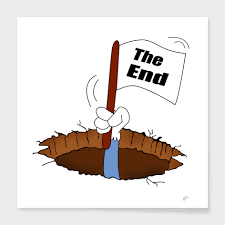

---

